# Vehicle Classification

## Evaluate your model


In [1]:
import os

from sklearn.metrics import accuracy_score, classification_report

from utils import utils
from models import resnet_50


## Experiment settings

Set here the two variables in the following way:

- **CONFIG_YML:** assign the path to the config.yml file used for the experiment you want to evaluate
- **WEIGHTS:** assign the path to the model weights (.h5 file) you want to evaluate


In [2]:
# Modify this
CONFIG_YML = "../experiments/exp_006/config_006.yml"
WEIGHTS = "../experiments/exp_006/model.76-1.1051.h5"

In [3]:
# (!) Don't touch this cell, will load the config file specified before
config = utils.load_config(CONFIG_YML)
config

{'seed': 123,
 'data': {'directory': '/home/app/src/data/car_ims_v2/train',
  'label_mode': 'categorical',
  'labels': 'inferred',
  'validation_split': 0.2,
  'image_size': [224, 224],
  'batch_size': 32},
 'model': {'weights': 'imagenet',
  'input_shape': [224, 224, 3],
  'classes': 196,
  'dropout_rate': 0.6,
  'data_aug_layer': {'random_flip': {'mode': 'horizontal_and_vertical',
    'name': 'random_flip'},
   'random_rotation': {'factor': 0.2, 'name': 'random_rotation'},
   'random_zoom': {'height_factor': 0.3,
    'width_factor': 0.3,
    'name': 'random_zoom'},
   'random_contrast': {'factor': 0.2}}},
 'compile': {'optimizer': {'adam': {'learning_rate': 5e-05}},
  'loss': 'categorical_crossentropy',
  'metrics': ['accuracy']},
 'fit': {'epochs': 80,
  'callbacks': {'model_checkpoint': {'filepath': '/home/app/src/experiments/exp_006/model.{epoch:02d}-{val_loss:.4f}.h5',
    'save_best_only': True,
    'verbose': 1},
   'tensor_board': {'log_dir': '/home/app/src/experiments/exp_006

In [4]:
# (!) Don't touch this cell, will use the config file to infer the class names
#     and also to load the corresponding testing dataset.
#     If you get an error, you must review your data/code.

MODEL_CLASSES = utils.get_class_names(config)

if len(MODEL_CLASSES) != config['model']['classes']:
    raise ValueError(
        "Number of classes doesn't match between your model "
        "and your data!"
    )

_dirname, _ = os.path.split(config['data']['directory'])
TEST_FOLDER = os.path.join(_dirname, 'test')

if not os.path.exists(TEST_FOLDER):
    raise ValueError("'test' folder not found!")
    
if len(os.listdir(TEST_FOLDER)) != config['model']['classes']:
    raise ValueError(
        "Number of classes doesn't match between your model "
        "and your testing dataset!"
    )
    
if set(os.listdir(TEST_FOLDER)) != set(MODEL_CLASSES):
    raise ValueError(
        "The name of the subfolders inside your test set "
        "doesn't match with the model classes!"
    )

## Load your model

Use `resnet_50.create_model()` and remember to properly setup the model weights!

Assign the model to the variable `cnn_model`.


In [5]:
# Complete this
# TODO

cnn_model = resnet_50.create_model(weights=WEIGHTS)

# It should print your model correctly
print(cnn_model.summary())

2022-06-21 14:25:47.680964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-21 14:25:47.690694: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-21 14:25:47.691526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-21 14:25:47.693801: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                             

## Get predictions from testing dataset

In [6]:
%%time
# (!) Don't touch this cell, will use the loaded model and
#     the function utils.predict_from_folder() to get 
#     model predictions and the corresponding true labels
#     so we can measure the accuracy

predictions, labels = utils.predict_from_folder(
    folder=TEST_FOLDER, 
    model=cnn_model, 
    input_size=config["data"]["image_size"], 
    class_names=MODEL_CLASSES,
)

if len(predictions) != len(labels):
    raise ValueError(
        "The lenght of predictions and labels lists doesn't match!"
    )

if not isinstance(predictions[0], str):
    raise ValueError(
        "Model predictions should be represented as string. E.g: 'Acura RL Sedan 2012'"
    )

if not isinstance(labels[0], str):
    raise ValueError(
        "Ground true labels should be represented as string. E.g: 'Acura RL Sedan 2012'"
    )


2022-06-21 14:25:54.224367: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2022-06-21 14:25:54.533865: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-21 14:25:54.534412: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-21 14:25:54.534457: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-06-21 14:25:54.535216: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-21 14:25:54.535471: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


CPU times: user 10min 47s, sys: 1min 23s, total: 12min 11s
Wall time: 11min 37s


In [7]:
# (!) Don't touch this cell

print(classification_report(y_true=labels, y_pred=predictions))


                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.63      0.98      0.77        44
                             Acura Integra Type R 2001       0.79      0.75      0.77        44
                                   Acura RL Sedan 2012       0.60      0.75      0.67        32
                                   Acura TL Sedan 2012       0.65      0.81      0.72        43
                                  Acura TL Type-S 2008       0.96      0.62      0.75        42
                                  Acura TSX Sedan 2012       1.00      0.30      0.46        40
                              Acura ZDX Hatchback 2012       0.41      0.79      0.54        39
              Aston Martin V8 Vantage Convertible 2012       0.46      0.49      0.47        45
                    Aston Martin V8 Vantage Coupe 2012       0.56      0.12      0.20        41
                  Aston Martin Virage C

In [8]:
# (!) Don't touch this cell

acc = accuracy_score(y_true=labels, y_pred=predictions)

print(f"Your model accuracy is {acc:.4f}!")

if acc < .3:
    raise ValueError("Your model accuracy is too low :(\nYou can do it better! :)")


Your model accuracy is 0.6925!


## Evaluation Model Report

In this project we train a pre-trained model on imagenet dataset to classify different types of cars.


I use regularization L2, data augmentation and drop out to try not overfit the model in train set. In these images we compare two different runnings on images without background that the only parameter I change is the learning rate. The learning rate of these runs is low (near 0.00001) but in the left two curves (pink for validation set and white blue for train set) the increasing of accuracy and decreasing of loss are much faster when the learning rate was 0.00005 than 0.00001. The number of epochs is less to get a better result than the other learning rate. 

Finally I use a model on the epoch 76 with the smallest loss 1.1051, because have best accuracy in test 0.69, I could just use the model at epoch 20 where the curves star to separate. However in the results on this epoch on test has smaller accuracy (0.65). So i decide to use the best. 


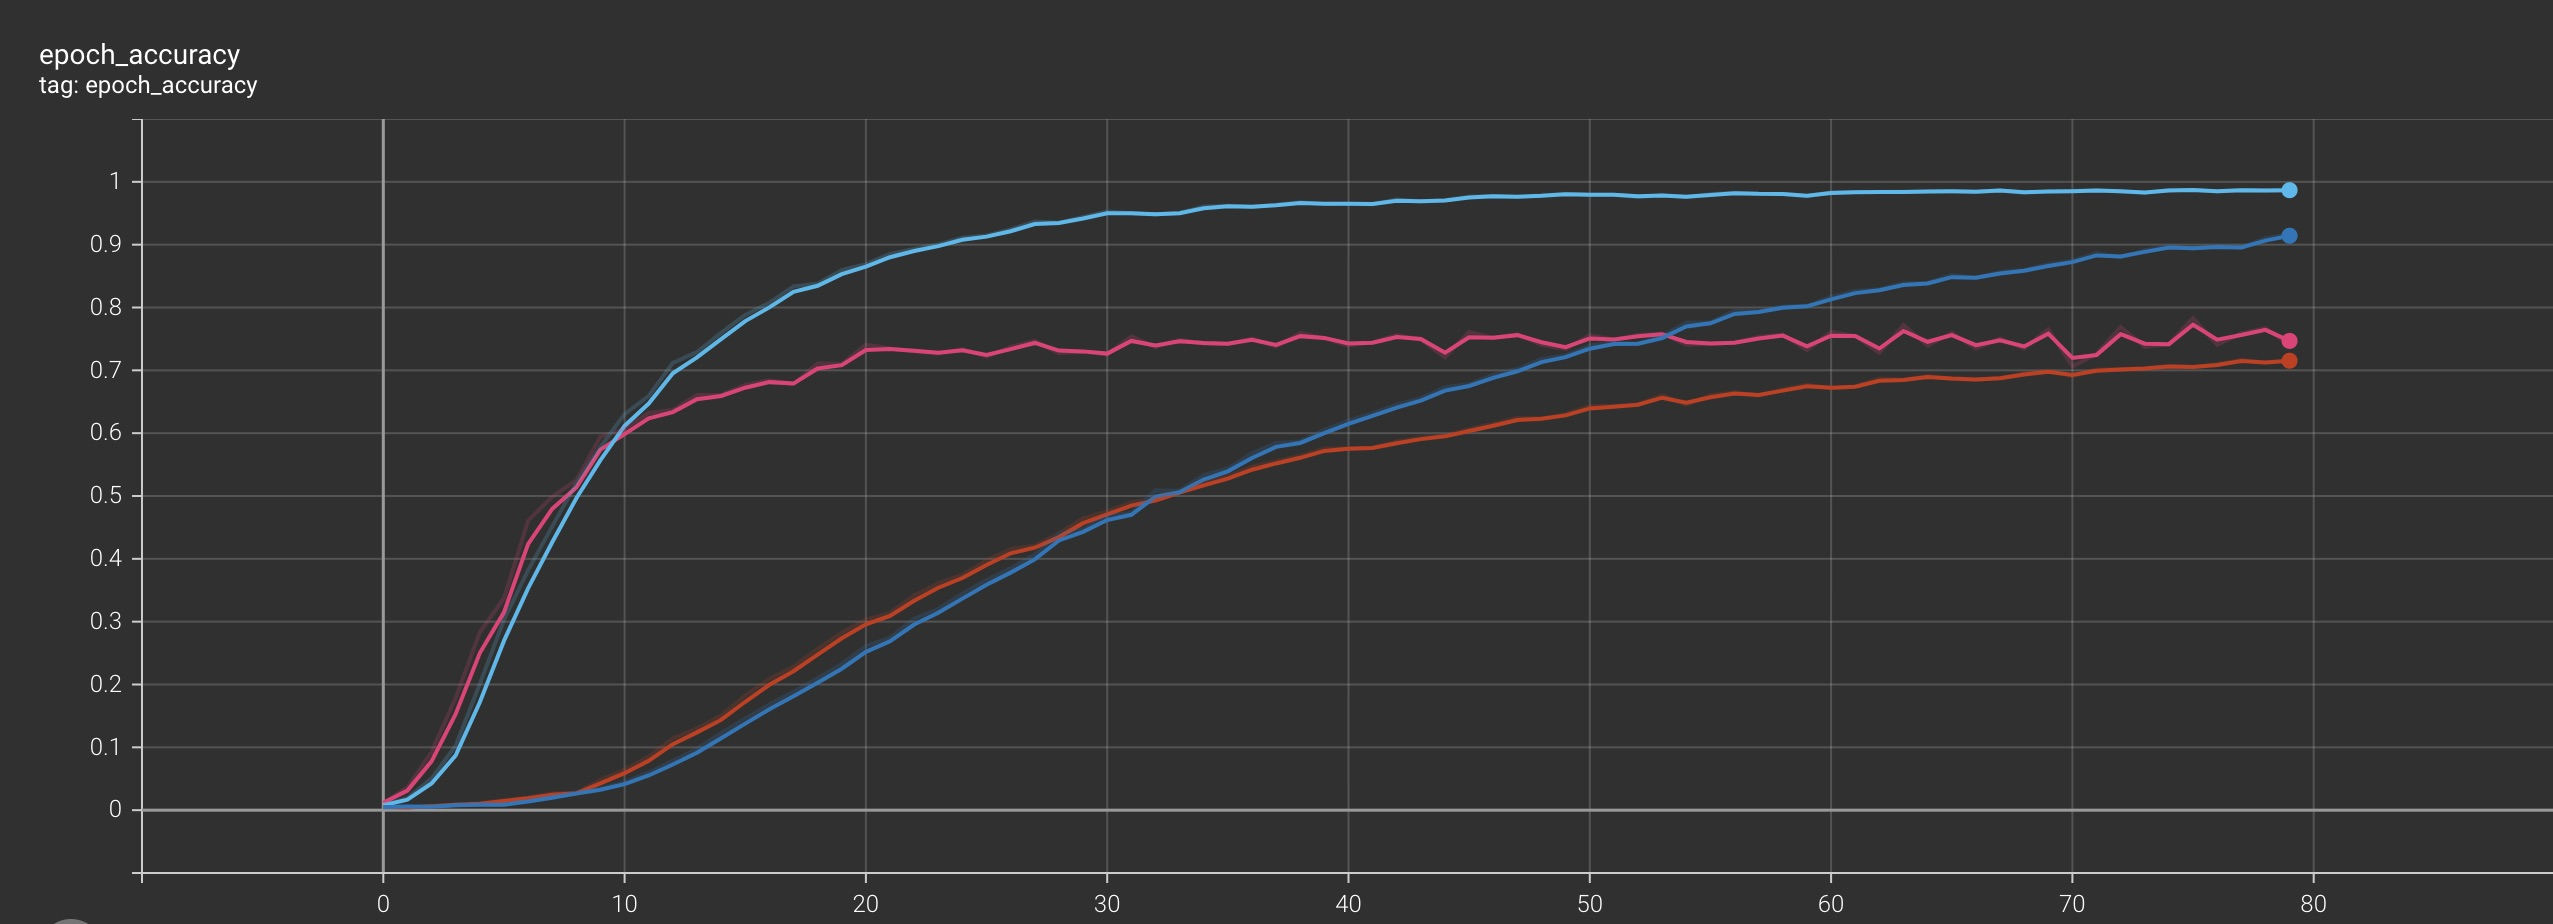



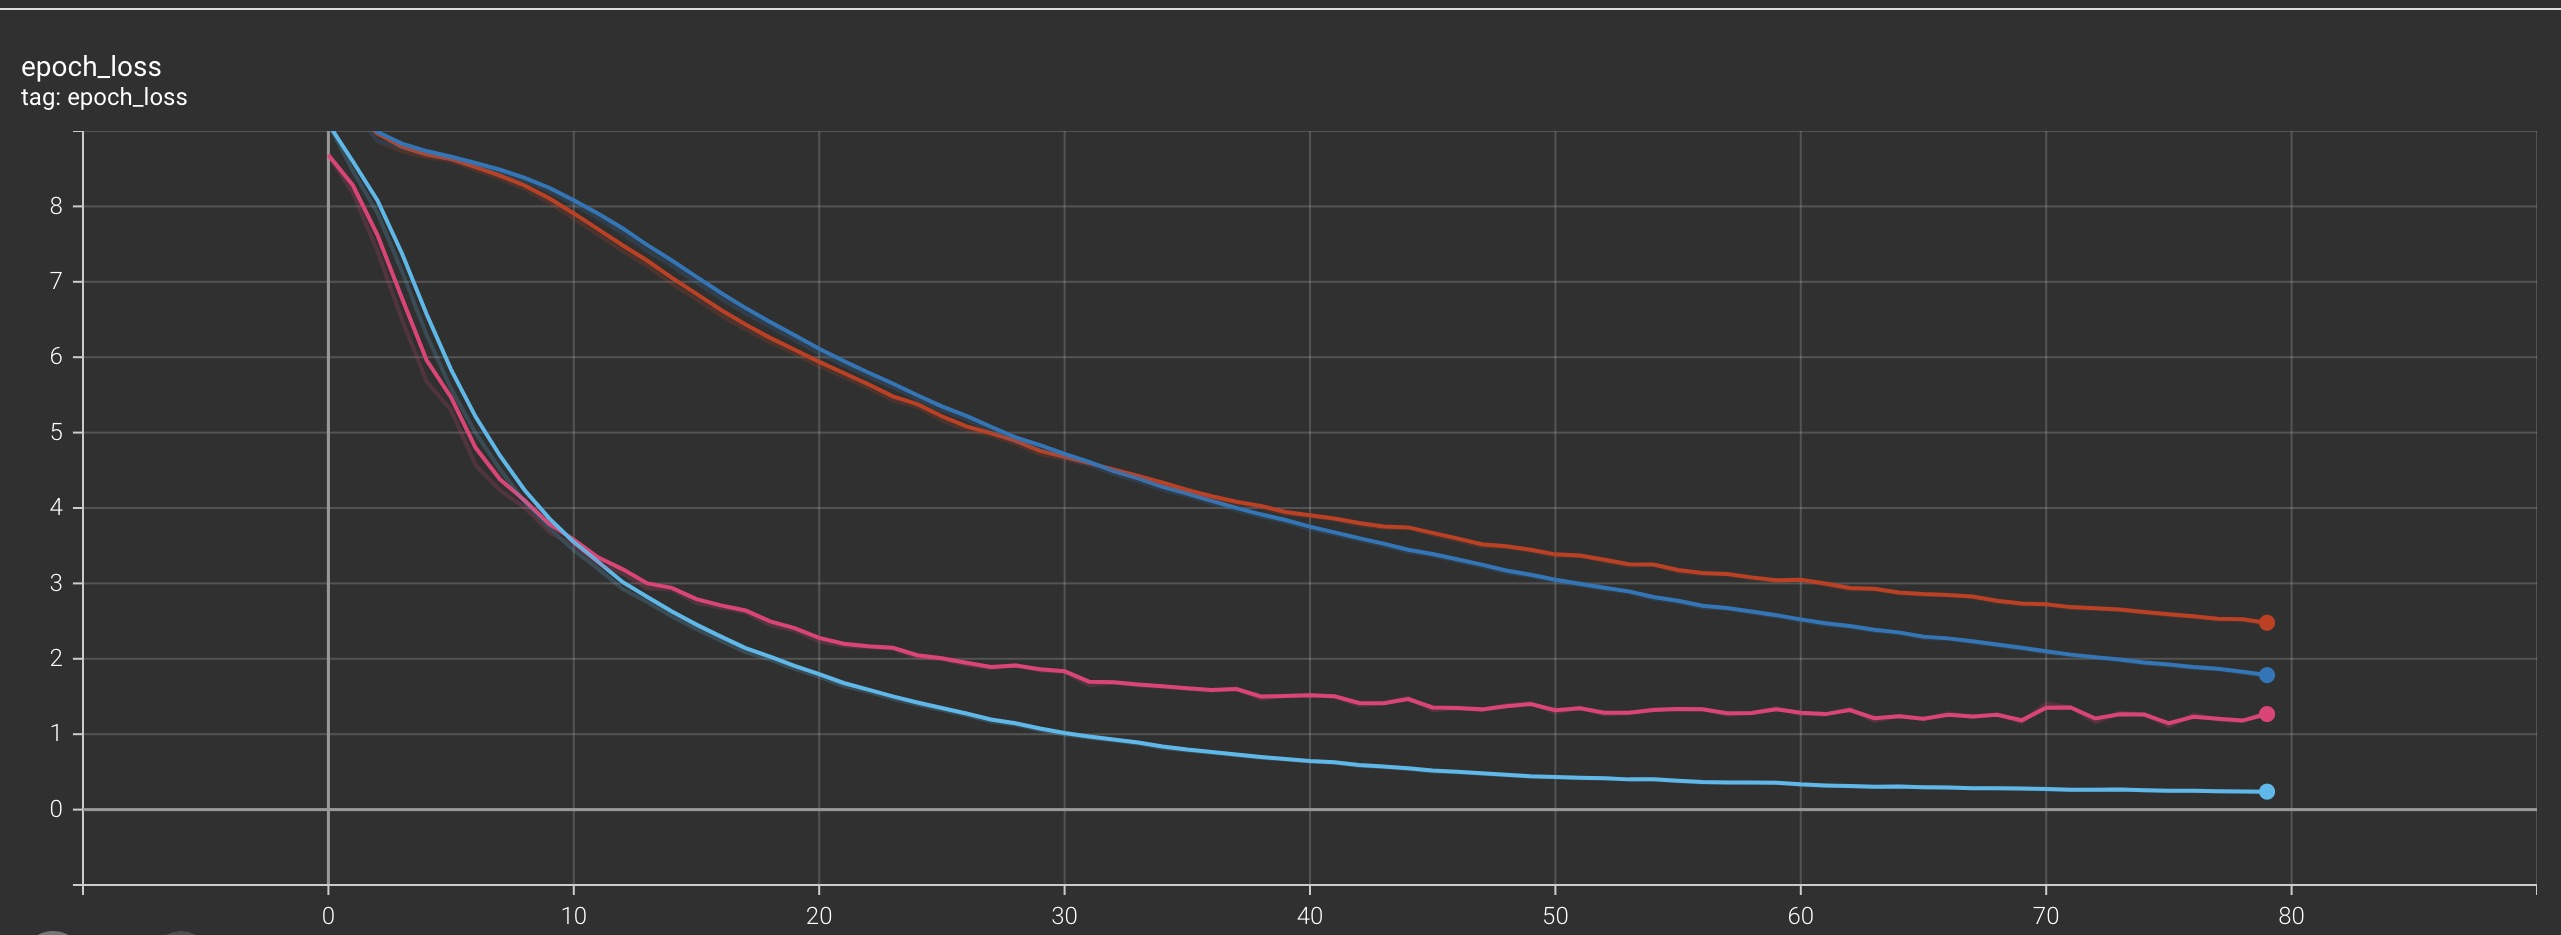

On the other hand in this case I compare the difference taking the train set with background and without background in the image. All the other parameters in the configuration are the same (we only saw few epochs for simplicity). We can see that in this case the accuracy is smaller with background on both sets, and the accuracy on test set was about 0.53. Only to remove background we win 20% of accuracy. So it's a good aproach to isolate the object we want to classify. 


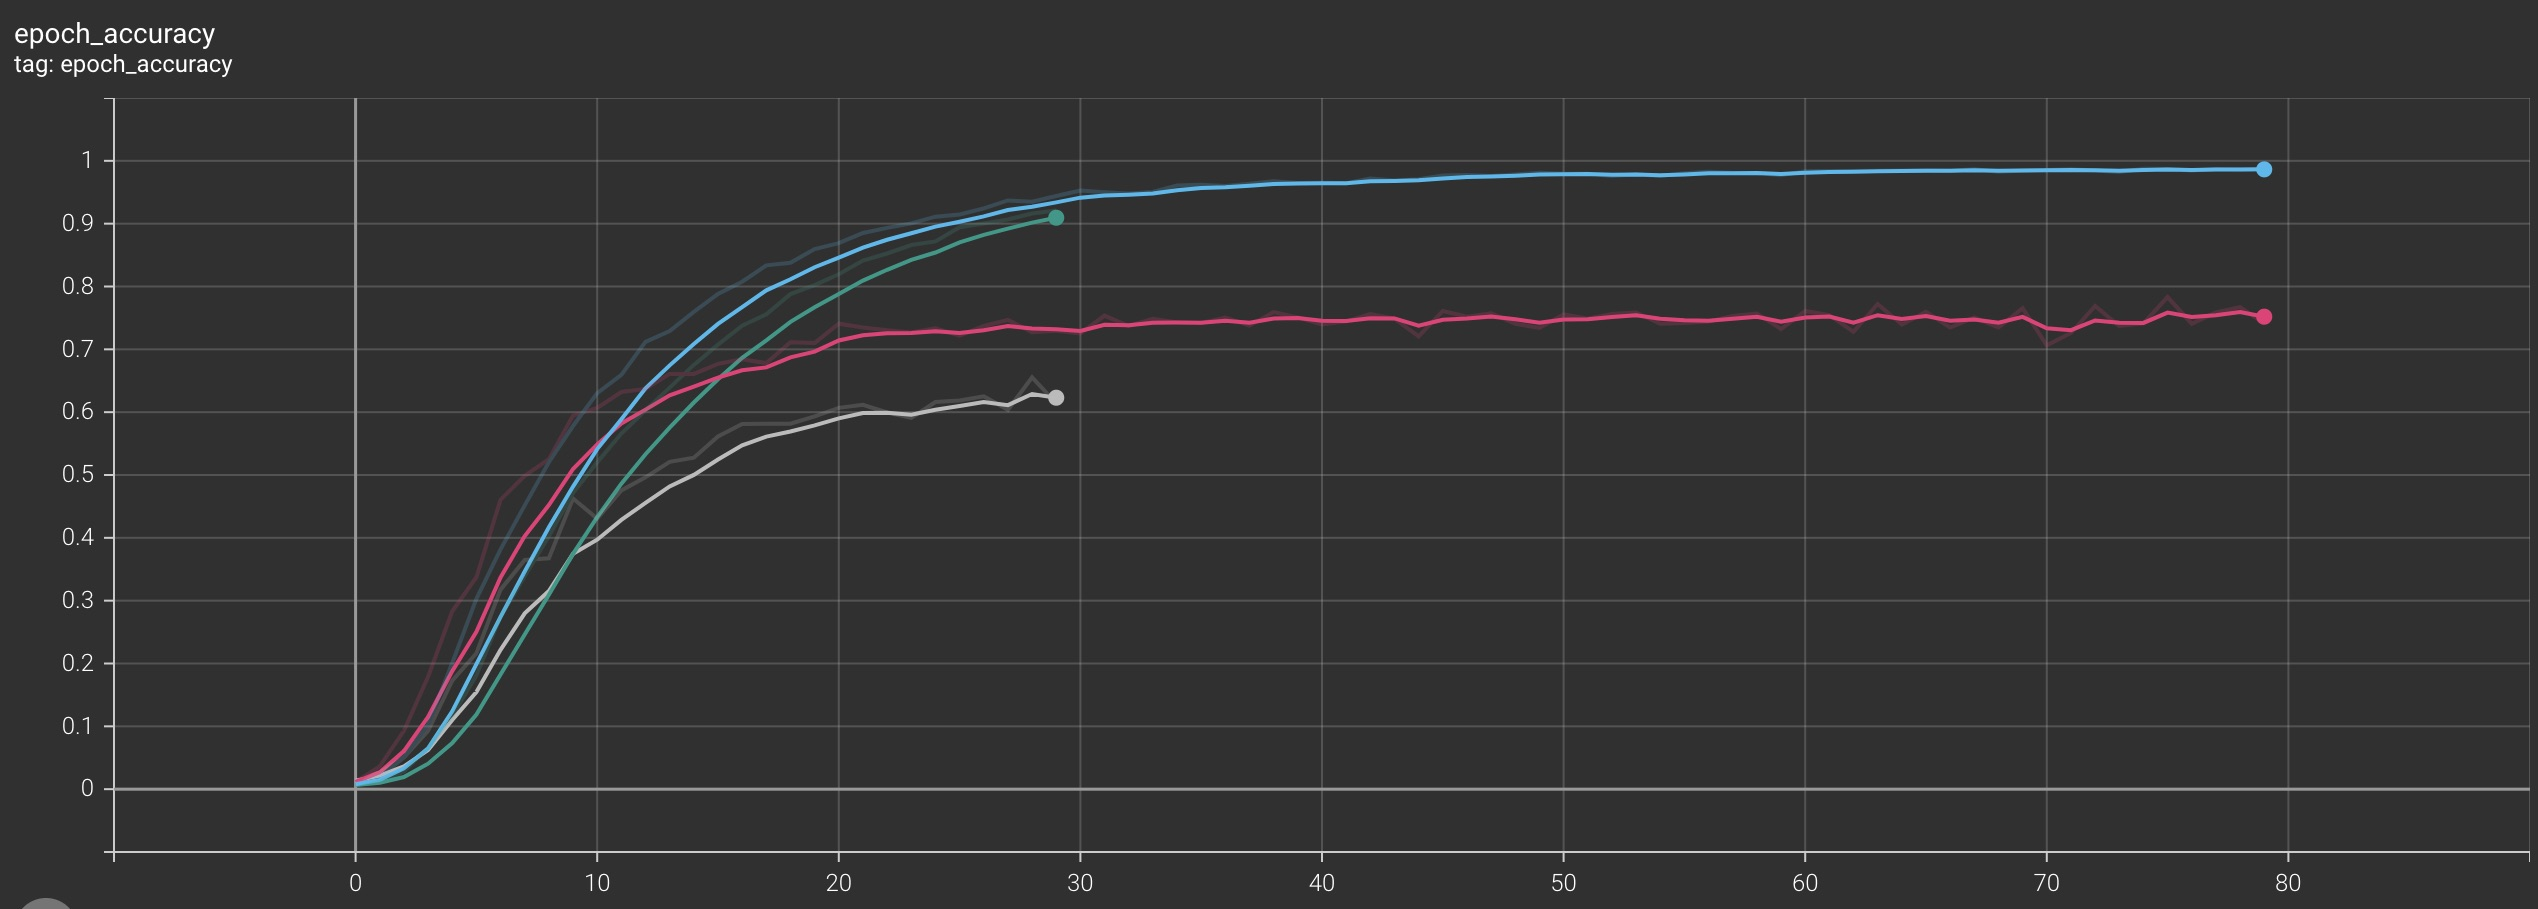